## Ex1

#### Unrolling plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
# Parse results from O0 and O2 files
def parse_results(filename):
    unrolling_factors = []
    times = []
    
    with open(filename, 'r') as f:
        for line in f:
            # Parse: U=1 | Sum = 1000000.000000 | Time = 2.623000 ms
            match = re.search(r'U=(\d+).*Time = ([\d.]+) ms', line)
            if match:
                u = int(match.group(1))
                time = float(match.group(2))
                unrolling_factors.append(u)
                times.append(time)
    
    return unrolling_factors, times

# Read data from both files
u_o0, times_o0 = parse_results('Ex1/results_O0.txt')
u_o2, times_o2 = parse_results('Ex1/results_O2.txt')

print(f"O0 - Unrolling factors: {u_o0}")
print(f"O0 - Times (ms): {times_o0}")
print(f"\nO2 - Unrolling factors: {u_o2}")
print(f"O2 - Times (ms): {times_o2}")

O0 - Unrolling factors: [1, 1, 2, 4, 8, 16, 32]
O0 - Times (ms): [2.623, 2.361, 1.378, 0.992, 0.986, 0.855, 1.037]

O2 - Unrolling factors: [1, 1, 2, 4, 8, 16, 32]
O2 - Times (ms): [1.16, 1.228, 0.732, 0.743, 0.574, 0.778, 1.175]


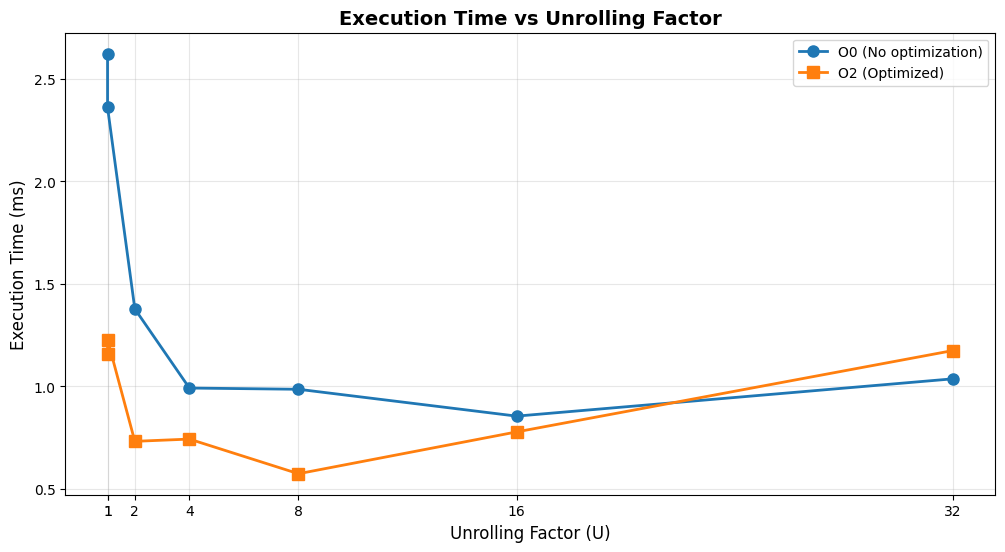

In [5]:
# Plot comparison between O0 and O2
plt.figure(figsize=(12, 6))

plt.plot(u_o0, times_o0, 'o-', label='O0 (No optimization)', linewidth=2, markersize=8)
plt.plot(u_o2, times_o2, 's-', label='O2 (Optimized)', linewidth=2, markersize=8)
plt.xlabel('Unrolling Factor (U)', fontsize=12)
plt.ylabel('Execution Time (ms)', fontsize=12)
plt.title('Execution Time vs Unrolling Factor', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(u_o0)

plt.show()

In [ ]:
# Find best unrolling factor for each optimization level
best_o0_idx = times_o0.index(min(times_o0))
best_o2_idx = times_o2.index(min(times_o2))

print(f"\nBest performance with O0: U={u_o0[best_o0_idx]}, Time={times_o0[best_o0_idx]:.3f} ms")
print(f"Best performance with O2: U={u_o2[best_o2_idx]}, Time={times_o2[best_o2_idx]:.3f} ms")


Best performance with O0: U=16, Time=0.855 ms
Best performance with O2: U=8, Time=0.574 ms

Overall speedup (best O2 vs best O0): 1.49x
